In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import seaborn as sns
import time

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_confusion_matrix, classification_report


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train = pd.read_csv("./botnet/UNSW_NB15_training.csv")
test = pd.read_csv("./botnet/UNSW_NB15_testing.csv")

In [3]:
train.shape, test.shape

((175341, 45), (82332, 45))

In [4]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
train.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,175341.000000,175341.000000,175341,175341,175341,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341,175341.000000
unique,NaN,NaN,133,13,9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,INT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,79946,94168,82275,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56000,NaN
mean,87671.000000,1.359389,NaN,NaN,NaN,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,...,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,NaN,0.680622
std,50616.731112,6.480249,NaN,NaN,NaN,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,...,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,NaN,0.466237
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,43836.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,87671.000000,0.001582,NaN,NaN,NaN,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,131506.000000,0.668069,NaN,NaN,NaN,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,...,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,NaN,1.000000


In [6]:
df = train
list_drop = ['id','attack_cat']
df.drop(list_drop,axis=1,inplace=True)

In [7]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


### Apply Clamping
The extreme values should be pruned to reduce the skewness of some distributions. The logic applied here is that the features with a maximum value more than ten times the median value is pruned to the 95th percentile. If the 95th percentile is close to the maximum, then the tail has more interesting information than what we want to discard.

The clamping is also only applied to features with a maximum of more than 10 times the median. This prevents the small value distributions from being excessively pruned.

In [8]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

### Apply log function to nearly all numeric, since they are all mostly skewed to the right

It would have been too much of a slog to apply the log function individually, therefore we followed a simple rule: if the number of unique values in the continuous feature is more than 50 then we have applied the log function. The reason more than 50 unique values are sought, is to filter out the integer based features that act more categorically.

In [9]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

In [10]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,175341,175341,175341
unique,133,13,9
top,tcp,-,INT
freq,79946,94168,82275


### Reducing the labels in catagorical features

Some features have very high cardinalities, so we reduced the cardinality to 5 or 6 per feature. The logic is to take the top 5 occuring labels in the feature as the labels and set the remainder to '-' (seldom used) labels.In this way when the encoding is done later on, the dimensionality will not explode.

In [11]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,175341,175341,175341
unique,6,5,6
top,tcp,-,INT
freq,79946,100270,82275


### Best Features

This section does an analysis (univariate statistical tests) to determine which features best predict the target feature.

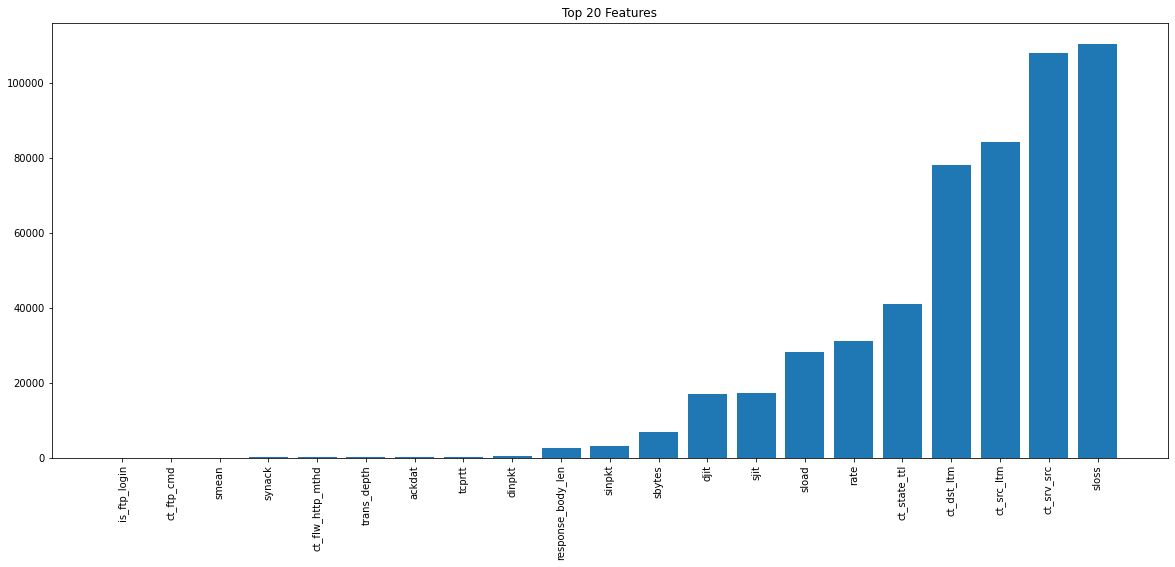

In [12]:
best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

plt.figure(figsize=(20,8))
plt.bar(feature_score['feature'][0:21],feature_score['score'][0:21], align='center')
plt.xticks(rotation=90)
plt.title("Top 20 Features")
plt.show()

### Encoding categorical features

The categorical features must be encoded to ensure that the models can interpret them. We have used one-hot encoding since none of the categorical features are ordinal.

In [35]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
feature_names = list(X.columns)

In [14]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [15]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

### Standardizing continuous features

We have used a standard scaler on the continuous features to put them all in the same order of size.

 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

In [17]:
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

In [18]:
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','Time to train','Time to predict','Total time'])
models = ['Logistic Regression', 'kNN','Random Forest', 'Gaussian Naive Bayes', 'Decision Tree(Gini Index)', 'SVM', 'XGBoost', 'Multi_layer Perceptron']

In [19]:
def fit_the_models(model_object,X_train,y_train,X_test,y_test):

    start = time.time()
    model = model_object.fit(X_train,y_train)
    end_train = time.time()
    y_predictions = model.predict(X_test) # These are the predictions from the test data.
    end_predict = time.time()    
    accuracy = accuracy_score(y_test, y_predictions)
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1s = f1_score(y_test, y_predictions, average='weighted')
    time_to_train = end_train - start
    time_to_predict = end_predict - end_train
    total_time = end_predict - start
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))

    return accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time , y_predictions

def plot_cm(model_object,X_test,y_test):
    plt.rcParams['figure.figsize']=5,5 
    sns.set_style("white")
    plot_confusion_matrix(model_object, X_test, y_test, cmap=plt.cm.Blues)  
    plt.show()

def print_classification_report(y_test,y_predict):
    target = ['Normal:Class 0', 'Attack:Class 1']
    print(classification_report(y_test, y_predict, target_names=target))


### Logistic Regression

Accuracy: 93.75%
Recall: 93.75%
Precision: 93.89%
F1-Score: 93.62%


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


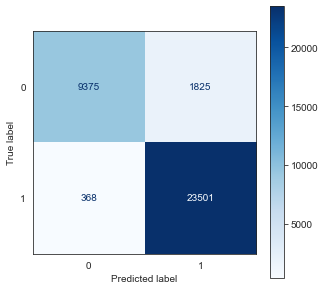

                precision    recall  f1-score   support

Normal:Class 0       0.96      0.84      0.90     11200
Attack:Class 1       0.93      0.98      0.96     23869

      accuracy                           0.94     35069
     macro avg       0.95      0.91      0.93     35069
  weighted avg       0.94      0.94      0.94     35069



In [20]:
lr = LogisticRegression(max_iter=1000)
accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time , y_predict = fit_the_models(lr,X_train,y_train,X_test,y_test)
plot_cm(lr,X_test,y_test)
print_classification_report(y_test,y_predict)
model_performance.loc['Logistic Regression'] = [accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time]


### kNN

Accuracy: 94.60%
Recall: 94.60%
Precision: 94.58%
F1-Score: 94.59%


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


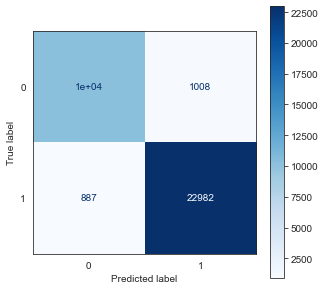

                precision    recall  f1-score   support

Normal:Class 0       0.92      0.91      0.91     11200
Attack:Class 1       0.96      0.96      0.96     23869

      accuracy                           0.95     35069
     macro avg       0.94      0.94      0.94     35069
  weighted avg       0.95      0.95      0.95     35069



In [21]:
kNN = KNeighborsClassifier(n_neighbors=3)
accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time , y_predict = fit_the_models(kNN,X_train,y_train,X_test,y_test)
plot_cm(kNN,X_test,y_test)
print_classification_report(y_test,y_predict)
model_performance.loc['kNN'] = [accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time]


### Random Forest Classifier

Accuracy: 92.17%
Recall: 92.17%
Precision: 92.98%
F1-Score: 91.84%


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


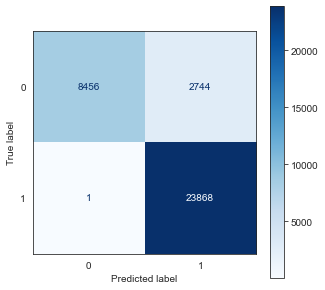

                precision    recall  f1-score   support

Normal:Class 0       1.00      0.76      0.86     11200
Attack:Class 1       0.90      1.00      0.95     23869

      accuracy                           0.92     35069
     macro avg       0.95      0.88      0.90     35069
  weighted avg       0.93      0.92      0.92     35069



In [22]:
rf = RandomForestClassifier(max_depth=3)
accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time , y_predict = fit_the_models(rf,X_train,y_train,X_test,y_test)
plot_cm(rf,X_test,y_test)
print_classification_report(y_test,y_predict)
model_performance.loc['Random Forest'] = [accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time]


### Gaussian Naive Bayes

Accuracy: 83.77%
Recall: 83.77%
Precision: 84.41%
F1-Score: 83.98%


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


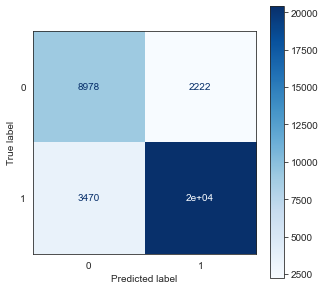

                precision    recall  f1-score   support

Normal:Class 0       0.72      0.80      0.76     11200
Attack:Class 1       0.90      0.85      0.88     23869

      accuracy                           0.84     35069
     macro avg       0.81      0.83      0.82     35069
  weighted avg       0.84      0.84      0.84     35069



In [23]:
nb = GaussianNB()
accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time , y_predict = fit_the_models(nb,X_train,y_train,X_test,y_test)
plot_cm(nb,X_test,y_test)
print_classification_report(y_test,y_predict)
model_performance.loc['Gaussian Naive Bayes'] = [accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time]


### Decision Tree (Information Gain)

Accuracy: 92.99%
Recall: 92.99%
Precision: 93.43%
F1-Score: 92.77%


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


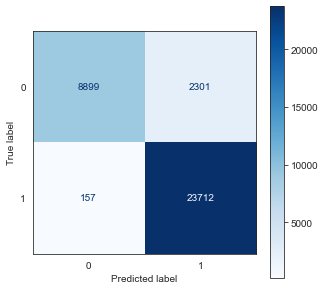

                precision    recall  f1-score   support

Normal:Class 0       0.98      0.79      0.88     11200
Attack:Class 1       0.91      0.99      0.95     23869

      accuracy                           0.93     35069
     macro avg       0.95      0.89      0.91     35069
  weighted avg       0.93      0.93      0.93     35069



In [24]:
dtree_ig = DecisionTreeClassifier(criterion='entropy',max_depth=5)
accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time , y_predict = fit_the_models(dtree_ig,X_train,y_train,X_test,y_test)
plot_cm(dtree_ig,X_test,y_test)
print_classification_report(y_test,y_predict)
model_performance.loc['Decision Tree (Information Gain)'] = [accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time]


### Decision Tree (Gini Index)

Accuracy: 93.47%
Recall: 93.47%
Precision: 93.69%
F1-Score: 93.31%


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


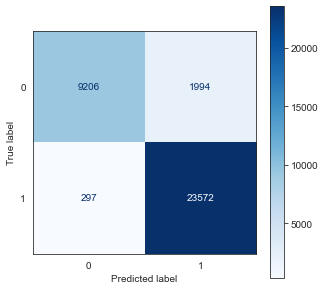

                precision    recall  f1-score   support

Normal:Class 0       0.97      0.82      0.89     11200
Attack:Class 1       0.92      0.99      0.95     23869

      accuracy                           0.93     35069
     macro avg       0.95      0.90      0.92     35069
  weighted avg       0.94      0.93      0.93     35069



In [25]:
dtree_gini = DecisionTreeClassifier(criterion='gini',max_depth=5)
accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time , y_predict = fit_the_models(dtree_gini,X_train,y_train,X_test,y_test)
plot_cm(dtree_gini,X_test,y_test)
print_classification_report(y_test,y_predict)
model_performance.loc['Decision Tree (Gini Index)'] = [accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time]

### Support Vector Machines

Accuracy: 93.63%
Recall: 93.63%
Precision: 93.89%
F1-Score: 93.48%


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


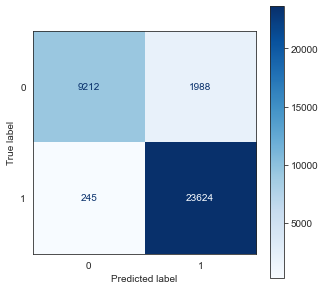

                precision    recall  f1-score   support

Normal:Class 0       0.97      0.82      0.89     11200
Attack:Class 1       0.92      0.99      0.95     23869

      accuracy                           0.94     35069
     macro avg       0.95      0.91      0.92     35069
  weighted avg       0.94      0.94      0.93     35069



In [26]:
svc =  LinearSVC()
accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time , y_predict = fit_the_models(svc,X_train,y_train,X_test,y_test)
plot_cm(svc,X_test,y_test)
print_classification_report(y_test,y_predict)
model_performance.loc['SVM'] = [accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time]

### X Gradient Boost

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 95.77%
Recall: 95.77%
Precision: 95.76%
F1-Score: 95.76%


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


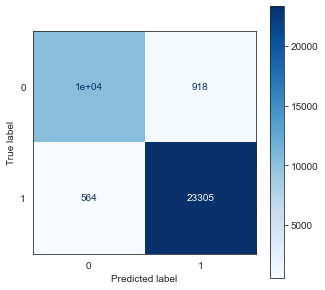

                precision    recall  f1-score   support

Normal:Class 0       0.95      0.92      0.93     11200
Attack:Class 1       0.96      0.98      0.97     23869

      accuracy                           0.96     35069
     macro avg       0.96      0.95      0.95     35069
  weighted avg       0.96      0.96      0.96     35069



In [27]:
xgb = XGBClassifier()
accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time , y_predict = fit_the_models(xgb,X_train,y_train,X_test,y_test)
plot_cm(xgb,X_test,y_test)
print_classification_report(y_test,y_predict)
model_performance.loc['XGBoost'] = [accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time]

### Multi-Layer Perceptron

Accuracy: 94.53%
Recall: 94.53%
Precision: 94.50%
F1-Score: 94.50%


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


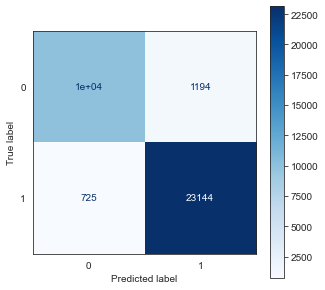

                precision    recall  f1-score   support

Normal:Class 0       0.93      0.89      0.91     11200
Attack:Class 1       0.95      0.97      0.96     23869

      accuracy                           0.95     35069
     macro avg       0.94      0.93      0.94     35069
  weighted avg       0.95      0.95      0.94     35069



In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time , y_predict = fit_the_models(mlp,X_train,y_train,X_test,y_test)
plot_cm(mlp,X_test,y_test)
print_classification_report(y_test,y_predict)
model_performance.loc['Multi-Layer Perceptron'] = [accuracy , recall , precision , f1s , time_to_train , time_to_predict , total_time]

### Overall performance evaluation

In [29]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'Time to train':'{:.1f}',
                                                                     'Time to predict':'{:.1f}',
                                                                     'Total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,Time to train,Time to predict,Total time
Logistic Regression,93.75%,93.75%,93.89%,93.62%,16.3,0.0,16.4
kNN,94.60%,94.60%,94.58%,94.59%,0.0,102.3,102.3
Random Forest,92.17%,92.17%,92.98%,91.84%,8.8,0.2,9.0
Gaussian Naive Bayes,83.77%,83.77%,84.41%,83.98%,0.2,0.1,0.2
Decision Tree (Information Gain),92.99%,92.99%,93.43%,92.77%,1.2,0.0,1.2
Decision Tree (Gini Index),93.47%,93.47%,93.69%,93.31%,1.0,0.0,1.0
SVM,93.63%,93.63%,93.89%,93.48%,22.9,0.0,23.0
XGBoost,95.77%,95.77%,95.76%,95.76%,15.0,0.1,15.1
Multi-Layer Perceptron,94.53%,94.53%,94.50%,94.50%,53.8,0.0,53.8
